<a href="https://colab.research.google.com/github/Yujini68/ESAA/blob/main/%EA%B3%BC%EC%A0%9C_1111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 03 케라스(Keras)

###01 딥러닝 준비

케라스 : 고수준의 딥러닝 라이브러리, GPU 연산을 수행하는 기능을 직접 실행하지 않고 텐서플로, CNTK, Theano, MXNet 등의 백엔드 엔진을 지정하여 사용 (2.4 버전 이후부터는 텐서플로만 지원)

- 직관적, 사용자 친화적 -> 코딩 난이도 쉬움
- 백엔드 엔진을 쉽게 변경할 수 있음
- 복잡한 구조의 모델 구현과 사용자 정의 훈련을 위해서는 텐서플로의 저수준 API를 활용해야함

### 1-1 주요 용어

#### 1-1-1 하이퍼 파라미터(hyper-parameter)

딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값, 사용자가 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라지기 때문에 매우 중요, 사용자가 별도로 설정해주지 않으면 기본값이 지정되어 있어서 자동으로 적용

모델의 예측 성능을 높이기 위해 하이퍼파라미터 값들을 조절하는 데 많은 시간을 투자하는 것이 일반적, 이처럼 하이퍼파라미터의 값을 조절하는 행위 -> 하이퍼파라미터 튜닝

#### 1-1-2 과소적합 vs. 과대적합(undefitting vs. overfitting)

훈련용 데이터 : 머신러닝 모델이 학습할 데이터, training set/train set

예측용 데이터 : 정답 레이블(label)이 없는 머신러닝 모델이 예측해야 하는 대상 데이터, test set

머신러닝에서 주어진 훈련 데이터에서 패턴 학습을 반복하는 것을 통해 모델을 완성해 나감

예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖는 경우, 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있는 경우, 모델이 충분히 학습되지 않은 경우(과소적합), 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태(과대적합 - 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 주어진 훈련 데이터에 대한 예측 성능이 좋지만, 예측 데이터에 대한 예측 오차가 발생할 확률 커짐) -> 모델이 학습한 후 예측성능이 떨어지게 됨

-> 모델을 학습시킬 때 과소적합, 과대적합 문제를 최소화하면서 정확도를 가장 높여야함, 훈련데이터 구성도 중요 - 예측 데이터와 분포가 동일하게 구성, 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소

훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델 결정

#### 1-1-3 에포크(epoch)

딥러닝 : 데이터셋을 학습하는 과정을 여러 번 반복하면서 최적의 모델 가중치를 찾는 과정

에포크 : 딥러닝 모델이 반복 훈련을 할 때 데이터 셋을 전부 학습에 사용하는 1회의 훈련 루프 , 1epoch

#### 1-1-4 손실함수(loss function)

예측 값과 정답 값의 차이 또는 오차(딥러닝 모델의 출력 값과 실제 값과의 차이)

사용자 정의, 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적

지도 학습의 분류 문제 : 이진 분류(binary_crossentropy 손실함수 사용, 출력층의 활성화 함수가 sigmoid인 경우), 다중 분류(categorical_crossentropy 손실함수 사용, 다중 분류의 대상이 되는 클래스가 원핫 벡터인 경우, 출력증의 활성함수 : softmax), 회귀 모델 (평균제곱오차, 평균절대값오차, 후버), 텐서플로 (사전 정의된 손실함수를 함수형과 클래스형으로 제공)

sparse_categorical_crossentropy 손실함수 : 정답 클래스가 레이블 값으로 표현되어 서로 다른 숫자로 구분되어 있는 경우

#### 1-1-5 경사하강법(gradient descent)

딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법





In [ ]:
# 클래스 및 함수 형태로 정의되어 있는 손실함수를 지정하여 사용
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

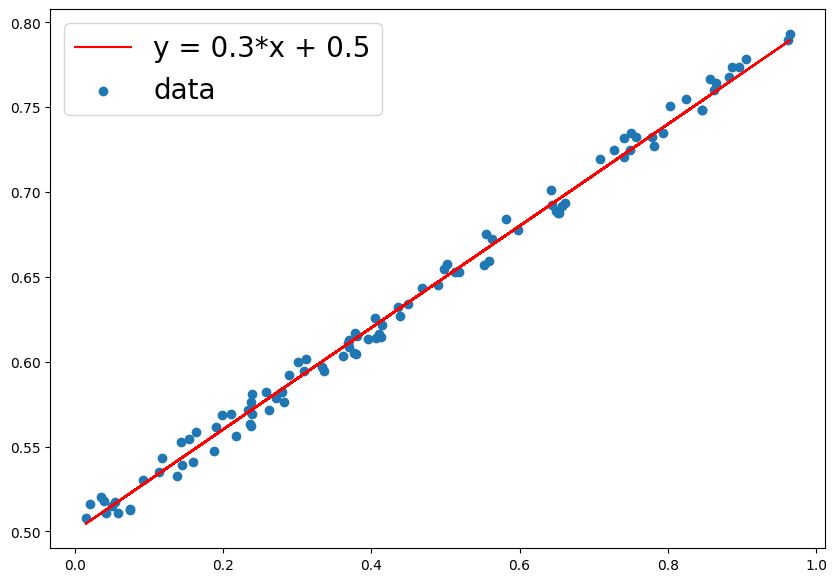

w:0.3, b:0.5


In [ ]:
# 단순 선형회귀 수식(y=wx+b)이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w = 0.5, b = 0.8, size = 50, noise = 1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy = y + noise
  plt.figure(figsize = (10,7))
  plt.plot(x, y, color = 'r', label = f'y = {w}*x + {b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x, y = make_linear(w = 0.3, b = 0.5, size = 100, noise = 0.01)


In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.63019, b = 0.58220 error = 17.73490
 5 w = 0.50740, b = 0.40566 error = 0.16257
10 w = 0.47812, b = 0.41705 error = 0.11965
15 w = 0.45367, b = 0.42847 error = 0.08913
20 w = 0.43263, b = 0.43830 error = 0.06652
25 w = 0.41453, b = 0.44677 error = 0.04977
30 w = 0.39895, b = 0.45406 error = 0.03737
35 w = 0.38554, b = 0.46033 error = 0.02818
40 w = 0.37400, b = 0.46573 error = 0.02138
45 w = 0.36407, b = 0.47037 error = 0.01634
50 w = 0.35552, b = 0.47437 error = 0.01261
55 w = 0.34816, b = 0.47781 error = 0.00984
60 w = 0.34183, b = 0.48077 error = 0.00780
65 w = 0.33638, b = 0.48332 error = 0.00628
70 w = 0.33170, b = 0.48552 error = 0.00515
------------------------------------------------------------
71 w = 0.3, b = 0.5 error = 0.00497


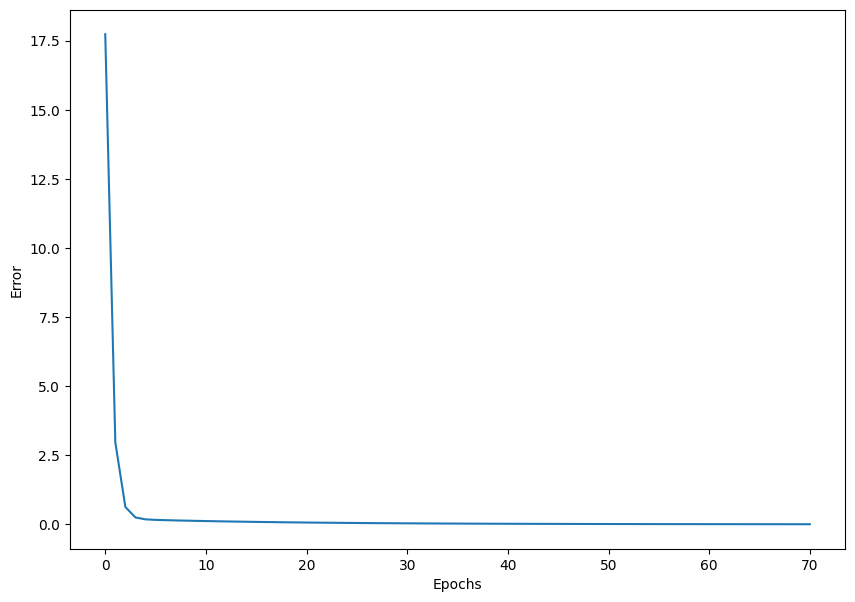

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### 1-2 딥러닝 프로세스

데이터 전처리, 모델의 생성, 컴파일, 훈련

예측 : 예측용 데이터셋을 입력하여 모델 예측 값을 얻는 과정

검증 : 모델의 성능을 평가하는 단계

#### 1-2-1 데이터 전처리

데이터를 모델에 주입하기 전에 데이터를 가공하는 단계

#### 1-2-2 모델 생성

모델의 구조를 정의하고 생성하는 단계

#### 1-2-3 모델 컴파일

손실함수, 옵티마이저, 평가지표 등 정의, 모델 인스턴스에 compile() 메소드를 적용, 속성값 설정

#### 1-2-4 모델 훈련

fit() 함수에 모델 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달, 훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch), 크기 및 콜백(callback) 함수 등을 지정

#### 1-2-4 모델 검증

모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산, 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가 진행, 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고, 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 때까지 이 과정을 반복

#### 1-2-4 모델 예측

#02  단순 신경망 훈련

### 2-1 선형회귀
하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법

단순 선형회귀 모형 : 하나의 X가 Y에 미치는 영향을 추정

### 2-2 뉴런

인공 신경망 모델을 구성하는 하나의 신경

뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트 됨

### 2-3 Dense 레이어

심층 신경망 모델을 구성하는 가장 기본 레이어

### 2-4 데이터셋 만들기



In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

<Dense name=dense_1, built=False>

In [ ]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


지도학습 : 정답이 있는 데이터를 활용해 데이터를 학습시키는 것

모델에 주입할 입력 데이터 -> 피처
정답 -> 레이블

머신러닝의 학습 방법은 지도학습 외에도 비지도학습, 강화학습, 준지도학습 등이 있음

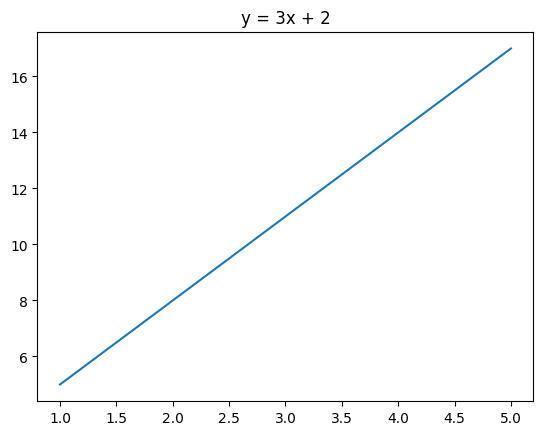

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

### 2-5 Sequential API

케라스의 Sequential API를 사용하면 매우 간결하게 딥러닝 모델을 만들 수 있음

Sequential API 방식은 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식

입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행

#### 2-5-1 모델 구조

Sequantial API를 사용하여 모델 생성 시 다음과 같은 두 가지 방법으로 모델을 구성할 수 있다.

방법1.
리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력한다. 대괄호([ ]) 안에 쉼표로 구분하여 층을 쌓는다. 앞에 위치한 층부터 연산을 먼저 처리하고 순차적으로 다음 층의 연산을 수행하게 된다. 다음 코드는 Dense 레이어 3개를 갖는 모델을 생성한다.


In [ ]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

방법2.
add 함수로 레이어 추가로 Sequential 클래스 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가하는 방식이다. add() 메소드 함수를 사용하여 1개의 층을 추가할 수 있다. 따라서 여러 개의 층을 추가하려면 add 함수를 반복해서 여러 번 사용해야 한다. 앞의 리스트형과 동일한 구조의 모델을 만들기 위해 다음 코드에서는 add 함수를 총 3번 사용했다.

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### 2-5-2 입력 데이터 형태

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
  # 입력 데이터의 shape = (150, 4)인 경우
  tf.keras.layers.Dense(10, input_shape = [4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2-5-3. 단순선형회귀 모델 정의

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

Dense 레이어는 use_bias = True가 기본 설정되어 상수항 b가 추가된다. use_bias = False로 지정하면 상수항 b를 포함하지 않게 됨

### 2-6 모델 요약

equential API로 모델을 만들었다면 model.summary()로 모델의 요약을 확인할 수 있음

### 2-7 컴파일

컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 2-8 훈련

In [ ]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - loss: 186.0652 - mae: 12.6779
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 108.4959 - mae: 9.7152
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 63.2919 - mae: 7.4534
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 36.9488 - mae: 5.7267
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 21.5969 - mae: 4.4084


In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs = 1200)

Epoch 1/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - loss: 230.3289 - mae: 14.0697
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 134.2748 - mae: 10.7730
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 78.2989 - mae: 8.2562
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 45.6786 - mae: 6.3348
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 26.6688 - mae: 4.8680
Epoch 6/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 15.5904 - mae: 3.7481
Epoch 7/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.1342 - mae: 2.8931
Epoch 8/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.3715 - mae: 2.2403
Epoch 9/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.1785 - mae: 1.7419
Epoch 10/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.9001 - mae: 1.3613
Epoch 11/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.1549 - mae: 1.0707
Epoch 12/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.7202 - mae: 0.8487
Epoch 13/1200
1/1 ━━━━━━━━

충분한 epoch 동안 훈련한 후 mse, mae 모두 개선되었음을 확인할 수 있다.

훈련에 대한 결과가 저장된 history 변수를 사용하여 epoch별 훈련 손실 및 평가지표를 시각화할 수 있다.

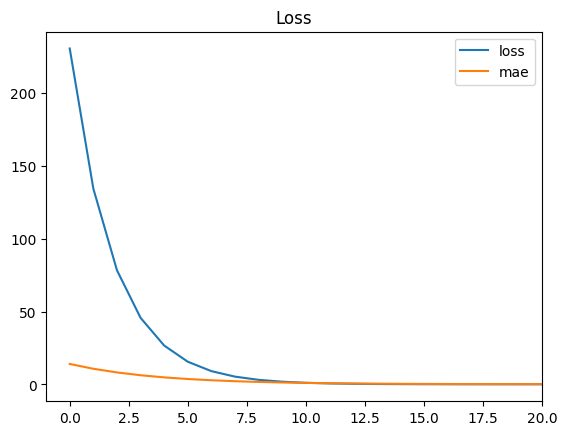

In [ ]:
# history 변수를 사용하여 epoch별 훈련 손실 및 평가지표를 시각화
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

### 2-9 검증

In [ ]:
# 검증
model.evaluate(x, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: 3.6346e-05 - mae: 0.0052


[3.634607855929062e-05, 0.0051746368408203125]

#### 2-10 예측

In [ ]:
# 예측
model.predict(np.array([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[32.02501]], dtype=float32)

# 3. 심층 신경망으로 이미지 분류

### 3-1. 케라스 내장 데이터셋 로드

boston_housing: 보스턴 주택 가격 데이터셋 (회귀)

cifar10: CIFAR10 이미지 분류 데이터셋 (분류)

cifar100: CIFAR100 이미지 분류 데이터셋 (분류)

mnist: mnist 손글씨 데이터셋 (분류)

fashion_mnist: 의류 데이터셋 (분류)

imdb: IMDb 영화 데이터셋 (분류)

reuters: Reuters 뉴스 토픽 (분류)

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [ ]:
# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 로드된 데이터셋 확인
print('train set : ', x_train.shape, y_train.shape)
print('test set : ', x_test.shape, y_test.shape)

train set :  (60000, 28, 28) (60000,)
test set :  (10000, 28, 28) (10000,)


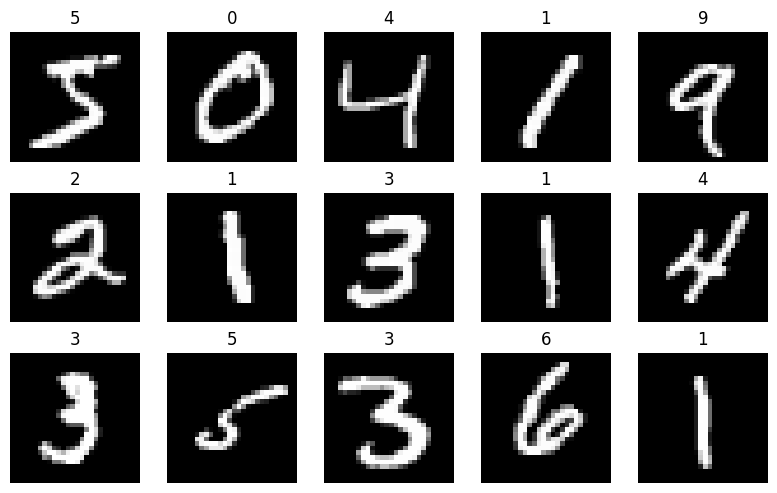

In [ ]:
#데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]

  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2. 데이터 전처리

이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [ ]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

정규화 전] 최소값 : 0, 최대값 : 255
정규화 후] 최소값 : 0.0, 최대값 : 1.0


In [ ]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3-3. Flatten 레이어

정규화를 하더라도 개별 데이터 값의 범위는 축소되지만 원본 배열의 형태는 그대로 유지됨

Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 하므로 이미지 데이터를 1차원으로 전처리하여 주입해야

In [ ]:
#reshape 사용
print(f'변경 전 shape : {x_train.shape}')
print(f'1D으로 shape 변경 후 : {x_train.reshape(60000, -1).shape}')

변경 전 shape : (60000, 28, 28)
1D으로 shape 변경 후 : (60000, 784)


In [ ]:
#Flatten 레이어를 사용
print(f'변경 전 shape : {x_train.shape}')
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape : (60000, 28, 28)
Flatten 적용 후 : (60000, 784)


### 3-4. 활성화 함수
활성화 함수 : 입력을 비선형 출력으로 변환해주는 함수

일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 함, 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현됨

자주 사용되는 활성화 함수로는 시그모이드, 하이퍼볼릭 탄젠트, ReLU, Leaky ReLU 등이 있음

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

<Dense name=dense_13, built=False>

In [ ]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

### 3-5. 입력과 출력

분류 모델의 가장 마지막 레이어는 출력층

출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 함, mnist는 0~9까지 총 10개의 클래스로 이루어져 있기 때문에 마지막 출력층의 노드 개수는 10개가 되어야 함

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),

        # 노드 = 10개(클래스 개수와 동일) = 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation = 'sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation = 'softmax')

<Dense name=dense_20, built=False>

### 3-6. 손실함수

분류 모델의 경우 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련할 수 있음

In [ ]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss = 'binary_crossentropy')

In [ ]:
# y가 원핫 벡터인 경우
model.compile(loss = 'categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss = 'sparse_categorical_crossentropy')

### 3-7. 옵티마이저

손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

케라스에서 지원하는 옵티마이저 목록 : SGD, Adam, Adagrad, Nadam, RMSprop, Adadelta, Adamax, Ftrl

In [ ]:
# 클래스 인스턴스로 지정
# 클래스 인스턴스로 지정하는 경우 학습률(lr)과 같은 파라미터를 직접 설정할 수 있다.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

### 3-8. 평가지표

분류 모델에 대한 평가 지표는 정확도를 나타내는 accuracy가 가장 많이 사용되며, auc, precision, recall 등의 지표도 많이 사용됨

모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고 가능

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9. 훈련

모델을 훈련할 때 검증 셋을 추가 지정하면 매 epoch마다 훈련 손실과 검증 손실, 그리고 각 셋에 대한 평가지표를 나란히 출력

In [ ]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8744 - loss: 0.4155 - val_accuracy: 0.9618 - val_loss: 0.1214
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9702 - loss: 0.0988 - val_accuracy: 0.9686 - val_loss: 0.1008
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9804 - loss: 0.0639 - val_accuracy: 0.9754 - val_loss: 0.0799
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9847 - loss: 0.0478 - val_accuracy: 0.9726 - val_loss: 0.0918
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9881 - loss: 0.0349 - val_accuracy: 0.9744 - val_loss: 0.0876
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9901 - loss: 0.0292 - val_accuracy: 0.9771 - val_loss: 0.0864
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9915 - loss: 0.0249 - val_accuracy: 0.9787 - val_loss: 0.0761
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9941 - loss: 0

### 3-10. 평가

In [ ]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도 : ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9726 - loss: 0.1062
검증 셋 정확도 :  0.9757000207901001


### 3-11. 예측

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# 첫 번째 데이터에 대한 분류 예측 결과 출력
predictions[0]

array([1.8238365e-10, 8.9942148e-08, 2.6166009e-07, 3.1586078e-09,
       7.3037285e-08, 1.8056757e-09, 2.0802414e-11, 9.9998373e-01,
       6.7176281e-10, 1.5742058e-05], dtype=float32)

In [ ]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


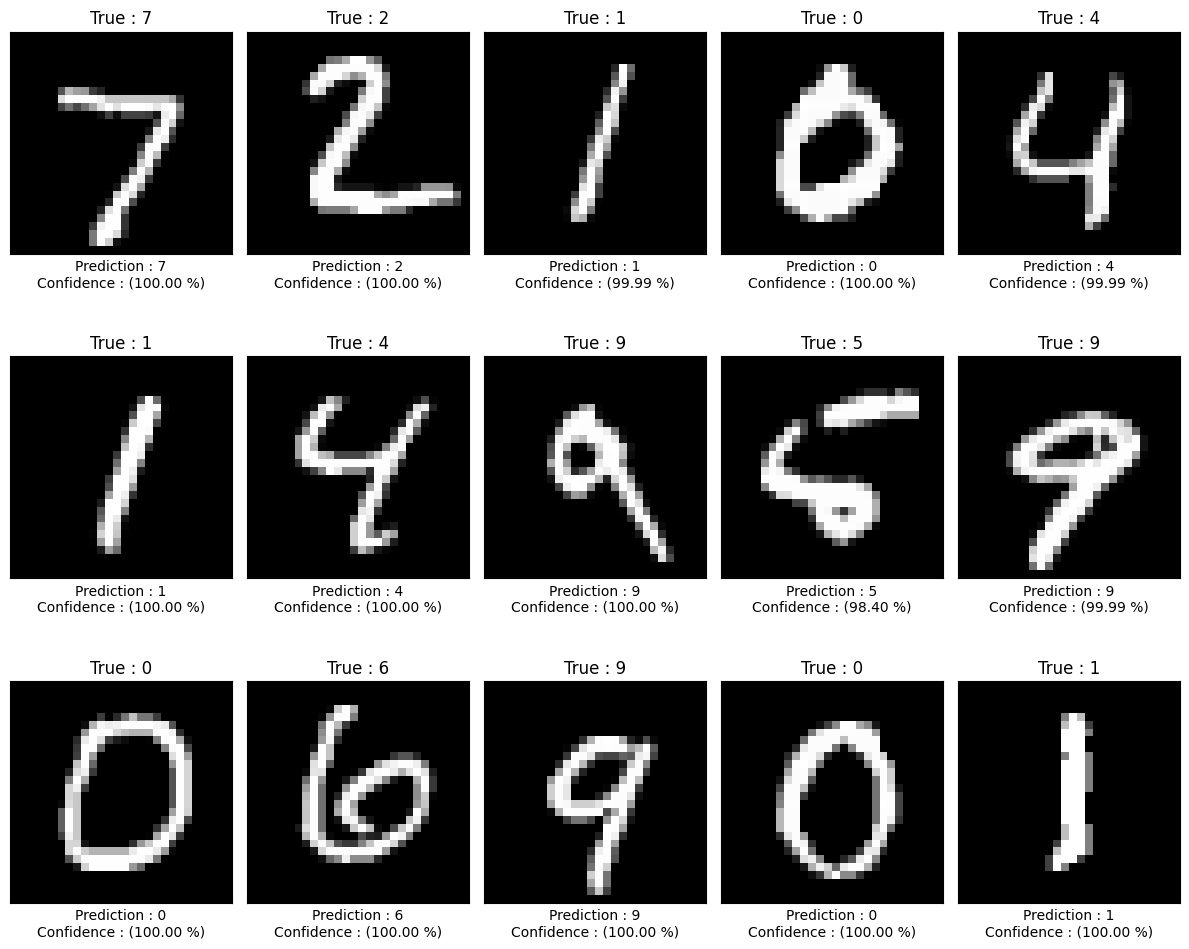

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap = 'gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True : {y_true}')
  ax.set_xlabel(f'Prediction : {y_pred}\nConfidence : ({confidence:.2f} %)')
plt.tight_layout()
plt.show()